In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

## Densité spectrale du bruit d'une machine à laver

In [3]:
from scipy.io.wavfile import read
samplerate, amplitude = read('data/machine_a_laver.wav')

In [4]:
from scipy.signal import periodogram
freq, psd = periodogram(amplitude, samplerate, )

## Filtre en Python

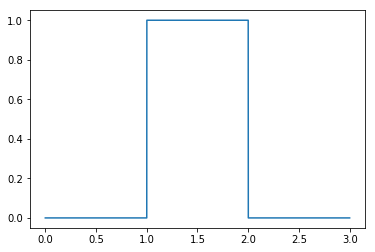

In [6]:
samplerate = 44100
Delta_t = 1/samplerate
signal = np.zeros(samplerate*3)
signal[samplerate:(samplerate*2)] = 1
N = len(signal)
x = np.arange(N)*Delta_t
plt.plot(x, signal)

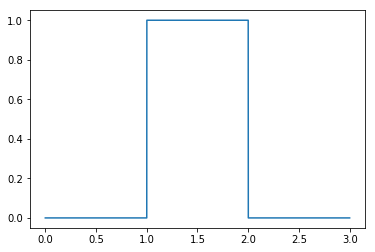

In [7]:
import numpy as np
signal_tilde = np.fft.rfft(signal)
signal_2 = np.fft.irfft(signal_tilde)
plt.plot(x, signal_2)

In [ ]:
def passe_bas(signal, f_c, samplerate=44100):
    signal_tilde = np.fft.rfft(signal)
    freqs = np.fft.rfftfreq(len(signal), 1/samplerate)
    H = 1/(1+1J*(freqs/f_c))
    signal_2 = np.fft.irfft(H*signal_tilde)
    return signal_2

## Onde gravitationnelle

In [ ]:
from readligo import loaddata
filename_H1 = 'data/H-H1_LOSC_4_V1-1126259446-32.hdf5'
strain_H1, time_H1, chan_dict_H1 = loaddata(filename_H1, 'H1')

In [ ]:
f, psd = welch(strain_H1, samplerate, nperseg=samplerate)

In [ ]:
from scipy.interpolate import interp1d    

def whiten(strain, dt):
    freqs_welch, psd_welch = welch(strain, fs=1/dt, nperseg=int(1/dt))
    interp_psd = interp1d(freqs_welch, psd_welch)

    strain_tilde = np.fft.rfft(strain)
    N = len(strain)
    freqs = np.fft.rfftfreq(N, dt)

    gain = 1 / np.sqrt(interp_psd(freqs))
    gain = gain/gain.max()
    white_strain_tilde = strain_tilde * gain
    white_strain = np.fft.irfft(white_strain_tilde)